<a href="https://colab.research.google.com/github/carnevaleprogramador/desafio1-ci-ncia-de-dados/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [25]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

import pandas as pd

lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

#1. Análise do faturamento


In [26]:
faturamento_por_loja = lojas.groupby('Loja')['Preço'].sum()
faturamento_medio = faturamento_por_loja.mean()

print("Faturamento por loja:")
print(faturamento_por_loja)
print(f"\nFaturamento médio: R${faturamento_medio:,.2f}")

Faturamento por loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

Faturamento médio: R$1,467,872.70


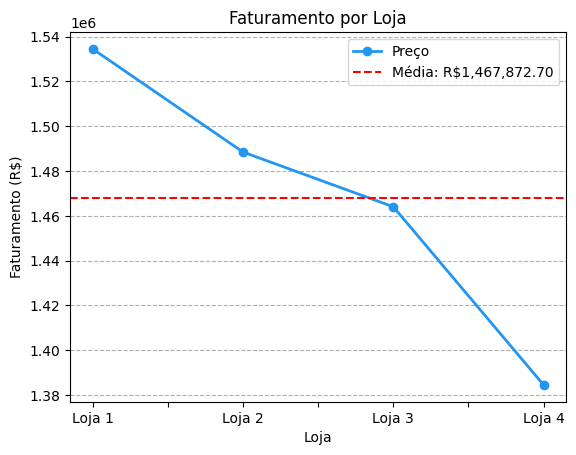

In [33]:
import matplotlib.pyplot as plt

cores = ['#003785', '#1465bb', '#2196f3', '#81c9fa']
faturamento_por_loja.plot(kind='line', marker='o', color='#2196f3', linewidth=2)

plt.axhline(faturamento_medio, color='red', linestyle='--', label=f'Média: R${faturamento_medio:,.2f}')
plt.title("Faturamento por Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--')
plt.legend()

# 2. Vendas por Categoria


Vendas por categoria em cada loja:

Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja                              

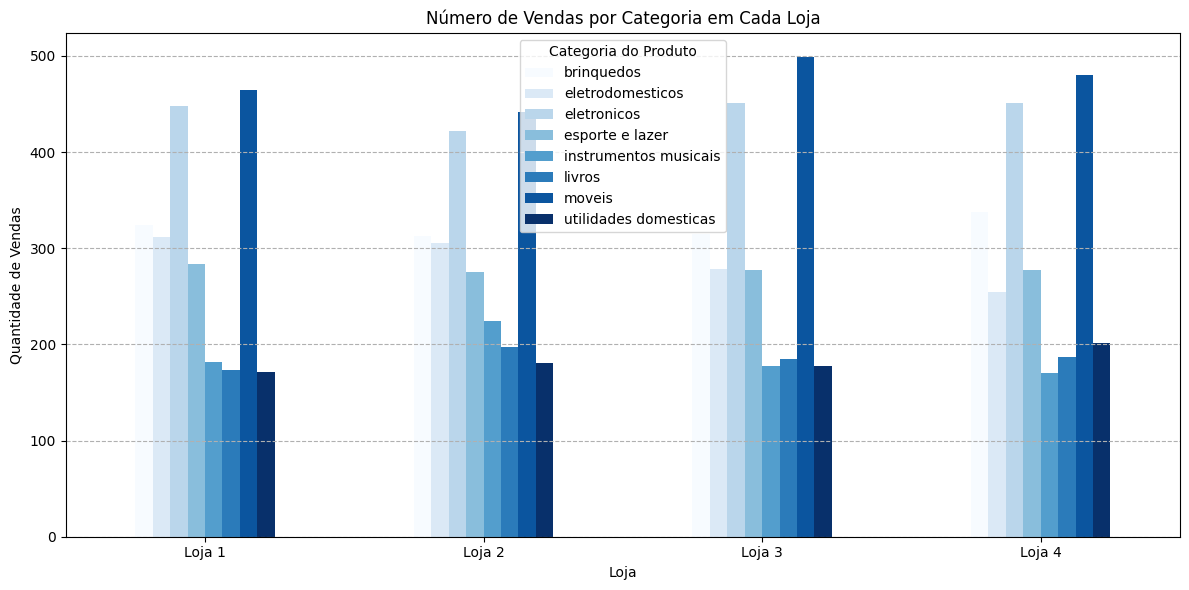

In [32]:
vendas_categoria = lojas.groupby(['Loja', 'Categoria do Produto'])['Produto'].count().unstack()

# Exibindo os dados no console
print("Vendas por categoria em cada loja:\n")
print(vendas_categoria)

# Plotando o gráfico
vendas_categoria.plot(kind='bar', figsize=(12, 6), colormap='Blues')
plt.title("Número de Vendas por Categoria em Cada Loja")
plt.ylabel("Quantidade de Vendas")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


Média de avaliação por loja:
Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


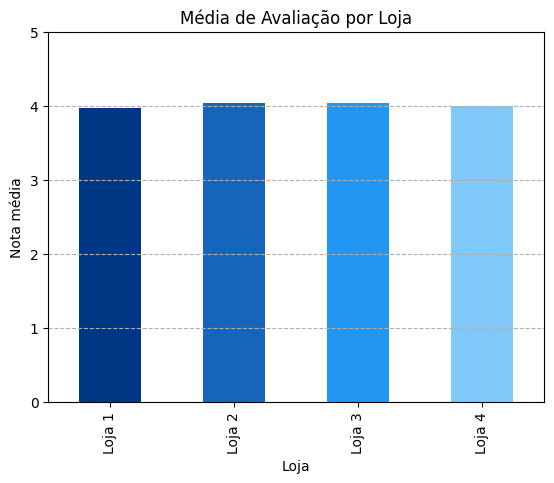

In [29]:
media_avaliacoes = lojas.groupby('Loja')['Avaliação da compra'].mean()
print("\nMédia de avaliação por loja:")
print(media_avaliacoes)

media_avaliacoes.plot(kind='bar', color=cores)
plt.title("Média de Avaliação por Loja")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--')
plt.ylabel("Nota média")
plt.show()


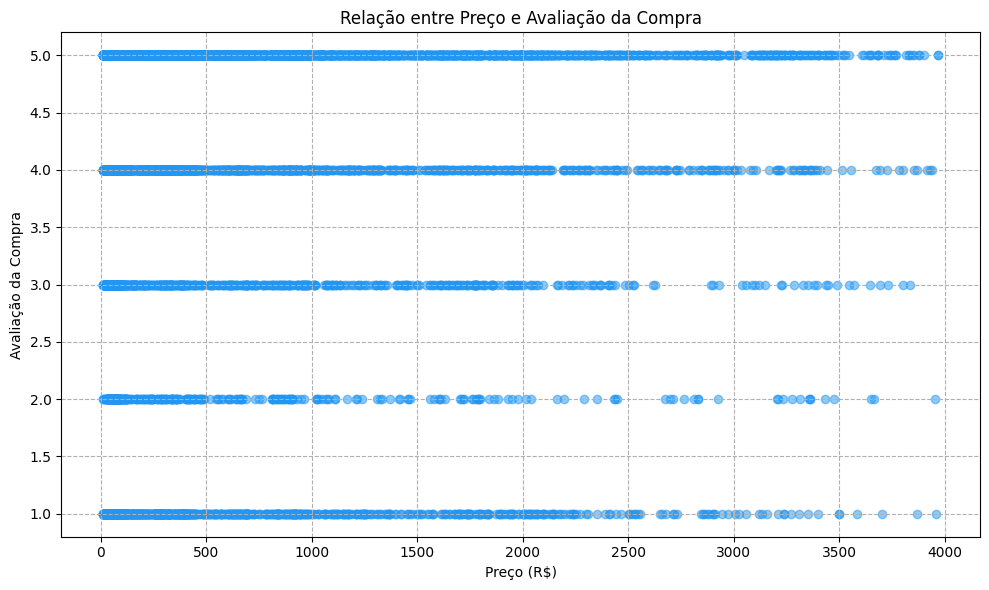

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(lojas['Preço'], lojas['Avaliação da compra'], alpha=0.5, color='#2196f3')
plt.title("Relação entre Preço e Avaliação da Compra")
plt.xlabel("Preço (R$)")
plt.ylabel("Avaliação da Compra")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [30]:
produtos_vendidos = lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')
mais_vendidos = produtos_vendidos.loc[produtos_vendidos.groupby('Loja')['Quantidade'].idxmax()]
menos_vendidos = produtos_vendidos.loc[produtos_vendidos.groupby('Loja')['Quantidade'].idxmin()]

print("\nProdutos mais vendidos:")
print(mais_vendidos)

print("\nProdutos menos vendidos:")
print(menos_vendidos)


Produtos mais vendidos:
       Loja                   Produto  Quantidade
24   Loja 1             Guarda roupas          60
79   Loja 2  Iniciando em programação          65
134  Loja 3             Kit banquetas          57
161  Loja 4                  Cama box          62

Produtos menos vendidos:
       Loja            Produto  Quantidade
11   Loja 1       Celular ABXY          33
82   Loja 2  Jogo de tabuleiro          32
105  Loja 3   Blocos de montar          35
178  Loja 4           Guitarra          33


# 5. Frete Médio por Loja



Frete médio por loja:
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


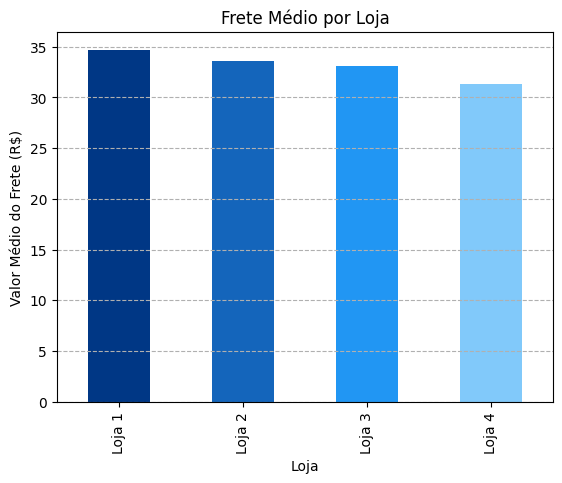

In [31]:
frete_medio = lojas.groupby('Loja')['Frete'].mean()
print("\nFrete médio por loja:")
print(frete_medio)

frete_medio.plot(kind='bar', color=cores)
plt.title("Frete Médio por Loja")
plt.ylabel("Valor Médio do Frete (R$)")
plt.grid(axis='y', linestyle='--')
plt.show()

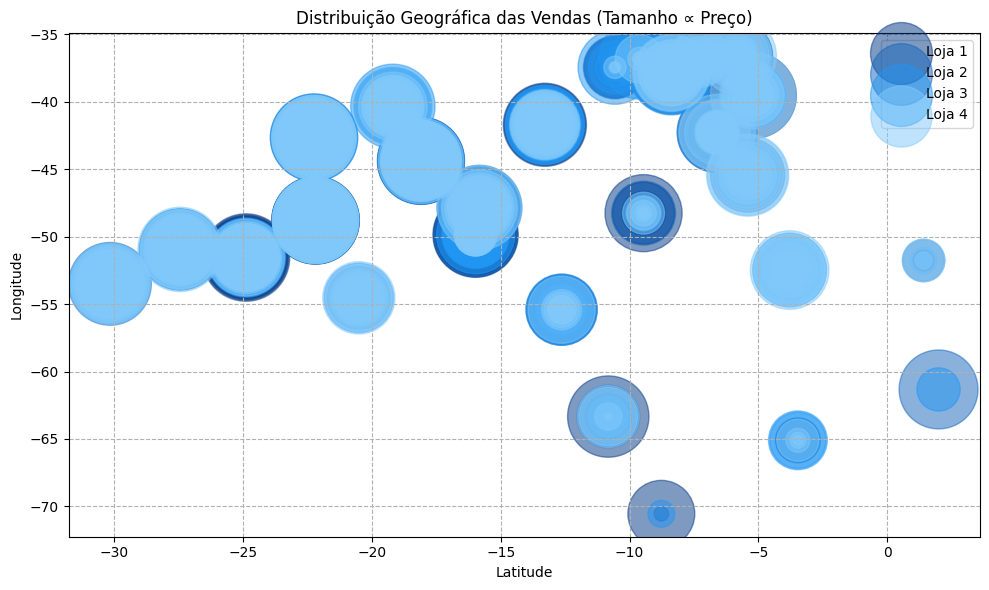

In [35]:
plt.figure(figsize=(10, 6))
for loja_nome, grupo in lojas.groupby('Loja'):
    plt.scatter(
        grupo['lat'], grupo['lon'],
        s=grupo['Preço'],  # tamanho proporcional ao valor vendido
        alpha=0.5,
        label=loja_nome,
        color=cores_lojas[loja_nome]
    )

plt.title('Distribuição Geográfica das Vendas (Tamanho ∝ Preço)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# **Relatório de Análise de Vendas por Loja**
## *Objetivo da Análise:*

Este relatório tem como objetivo analisar as vendas de quatro lojas e avaliar seu desempenho a partir de diversos parâmetros, incluindo faturamento, vendas por categoria de produto, avaliações dos clientes, produtos mais e menos vendidos e frete médio. A análise visa identificar os pontos fortes e fracos de cada loja para tomar uma decisão informada sobre qual loja deve ser vendida, com base nos resultados apresentados.


---


# 1. Faturamento Total e Médio por Loja:

**Faturamento Total por Loja:**

Loja 1: R$ 1,534,509.12

Loja 2: R$ 1,488,459.06

Loja 3: R$ 1,464,025.03

Loja 4: R$ 1,384,497.58

**Faturamento Médio:**
O faturamento médio entre as quatro lojas é de R$ 1,467,872.70. Este valor serve como referência para compararmos o desempenho de cada loja.

Justificativa:
A Loja 1 apresenta o maior faturamento entre as lojas, o que pode ser interpretado como um ponto forte, sugerindo que ela tem uma boa base de vendas. A Loja 4, embora tenha o menor faturamento, ainda está relativamente próxima das outras, mas seu desempenho é inferior em comparação.


---


# 2. Vendas por Categoria de Produto
Analisando as vendas por categoria de produto em cada loja, temos o seguinte panorama:

Justificativa:
A Loja 1 se destaca em várias categorias, como móveis (465 unidades vendidas), eletrônicos (448 unidades) e brinquedos (324 unidades), mostrando que há um bom equilíbrio em seu portfólio de produtos.

A Loja 4 também tem um desempenho bom em móveis e eletrônicos, mas suas vendas de instrumentos musicais são significativamente mais baixas, o que pode indicar uma fraqueza nesse segmento.

A Loja 3 se destaca em móveis (499 unidades) e eletrônicos (451 unidades), mas a Loja 2 se sai melhor na categoria instrumentos musicais, o que poderia ser uma oportunidade a ser explorada.

---

# 3. Avaliação das Compras
A média de avaliações dos clientes por loja é a seguinte:

Loja 1: 3.98

Loja 2: 4.04

Loja 3: 4.05

Loja 4: 3.99

Justificativa:
A Loja 3 obteve a melhor média de avaliações (4.05), o que sugere que os clientes estão mais satisfeitos com o atendimento, a qualidade dos produtos ou o processo de compra nessa loja.

A Loja 1 tem uma avaliação um pouco mais baixa (3.98), o que pode indicar que há áreas a melhorar em termos de experiência do cliente, como atendimento, qualidade ou velocidade de entrega.

---

# 4. Produtos Mais e Menos Vendidos
Justificativa:
A Loja 1 se destaca no Guarda Roupas, um produto de destaque em seu portfólio, enquanto a Loja 4 tem como destaque a Cama Box, um item popular em seu estoque.

A Loja 3 se beneficia de um bom desempenho no Kit Banquetas, mas os produtos menos vendidos são importantes para reavaliar as estratégias de marketing e vendas.

A Loja 2 tem um bom desempenho com o Iniciando em Programação, um produto único em seu portfólio, que parece estar atraindo clientes interessados nesse tipo de produto.

---

# 5. Frete Médio por Loja
O frete médio por loja é:

Loja 1: R$ 34.69

Loja 2: R$ 33.62

Loja 3: R$ 33.07

Loja 4: R$ 31.28

Justificativa:
O frete médio mais alto da Loja 1 pode impactar negativamente as avaliações dos clientes, especialmente se o custo de frete for um fator importante na decisão de compra.

A Loja 4 tem o frete médio mais baixo, o que pode ser um diferencial competitivo, melhorando a experiência do cliente e possivelmente
gerando maior fidelização.

---

# 6. Conclusões e Recomendação
Análise Geral:

A Loja 1 se destaca em termos de faturamento e possui um bom desempenho em várias categorias de produtos, mas suas avaliações estão abaixo das demais lojas, e o frete médio elevado pode impactar negativamente nas vendas.

A Loja 3 tem a melhor média de avaliações e um bom desempenho em móveis e eletrônicos, mas o faturamento está abaixo da Loja 1.

A Loja 4 apresenta o menor frete médio e um bom desempenho geral, mas está atrás em faturamento e avaliações.

A Loja 2, embora não tenha se destacado tanto em termos de faturamento, se sai bem em categorias específicas, como instrumentos musicais, e tem um bom equilíbrio nas avaliações.

Recomendação Final: Com base na análise global, a Loja 1 parece ser a mais forte em termos de faturamento, mas seu frete alto e as avaliações mais baixas podem prejudicar seu desempenho no longo prazo. A Loja 3, com uma alta avaliação e um bom desempenho nas vendas de móveis e eletrônicos, parece ser uma boa candidata para vender, já que tem um bom equilíbrio de desempenho e pode melhorar ainda mais com ajustes no frete.

---

# Conclusão:
A Loja 3 deve ser a mais recomendada para venda, principalmente por seu desempenho consistente em avaliações e vendas, com a possibilidade de ajustes no frete para melhorar ainda mais a competitividade.